<a href="https://colab.research.google.com/github/LouisVanLangendonck/UPC-AML-ArchitectureClassif/blob/main/training_performance_reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Performance Evaluation

Specify here the MAIN DIRECTORY of the project

In [ ]:
project_dir = '/content/drive/MyDrive/FIB-2022-2023/aml'

## Imports

In [1]:
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## Function Definition

In [9]:
def model_training_report(model_path, plots=False):
    model_name = model_path.split('/')[-1]
    model_family = model_path.split('/')[-2]

    history = pd.read_csv(model_path + '/history.csv')
    epochs = history['epoch'] 
    acc = history['acc']
    weighted_f1 = history['f1_score']
    val_acc = history['val_acc']
    val_weighted_f1 = history['val_f1_score']
    loss = history['loss']
    val_loss = history['val_loss']
    #print('epoch with lowest val loss {}'.format(val_loss.idxmin()))

    if plots:

      fig, axs = plt.subplots(1, 2, figsize=(15, 7))
      fig.suptitle("Training and Validation curves for {}: {}".format(model_family, model_name), fontsize=16)

      axs[0].plot(epochs, weighted_f1, 'b-', label = 'Training', markersize=10)
      axs[0].plot(epochs, val_weighted_f1, 'r-', label = 'Validation ', markersize=10)
      axs[0].set_title('Training and Validation weighted f1-score')
      axs[0].axvline(x=val_loss.idxmin(), color='black', ls='--', lw=1.5, label='Early Stopping / Optimal Model')
      axs[0].legend(loc=2, prop={'size': 16})
      axs[0].tick_params(axis='both', which='major', labelsize=16)
      axs[0].set_xlabel('Epochs', fontsize=18)
      axs[0].set_ylabel('weighted f1-score', fontsize=16)
      
      axs[1].plot(epochs, loss, 'g-', label='Training', markersize=10)
      axs[1].plot(epochs, val_loss, 'y-', label='Validation', markersize=10)
      axs[1].axvline(x=val_loss.idxmin(), color='black', ls='--', lw=1.5, label='Early Stopping / Optimal Model')
      axs[1].set_title('Training and Validation loss')
      axs[1].legend(loc=2, prop={'size': 16})
      axs[1].tick_params(axis='both', which='major', labelsize=16)
      axs[1].set_xlabel('Epochs', fontsize=18)
      axs[1].set_ylabel('Categorical Crossentropy Loss', fontsize=16)
      fig.show()
    
    return val_weighted_f1[val_loss.idxmin()], val_acc[val_loss.idxmin()]

## Evaluation of all MLP models

Model evaluation loop for all models. There is the option to filter on which loss function is used at the top (with 'CEL' being Cross-entropy Loss, 'FL' being Focal Loss and 'WCEL' being weighter Cross-entropy Loss)

In [ ]:
model_type = 'CEL' #Choose from: 'all', 'CEL', 'FL' and 'WCEL'


for model_list in os.listdir(os.path.join(project_dir,'models/mlp_models_selection/')):
  if 'feat+' in model_list:
    saved_model_path = os.path.join(project_dir,'models/mlp_models_selection/')+model_list
    print('\033[1m' + '--------------------------------------------------------')
    print('Training Report for {}'.format(model_list))
    max_f1 = dict()
    max_acc = dict()

    print('--------------------------------------------------------'+ '\033[0m')
    for model_str in os.listdir(saved_model_path):
      if model_type == 'FL':
        if 'focal' in model_str:
          max_f1[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[0]
          max_acc[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[1]
      elif model_type == 'CEL':
        if 'no_sample_weights' in model_str:
          max_f1[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[0]
          max_acc[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[1]
      elif model_type == 'WCEL':
        if (not 'no_sample_weights' in model_str) and (not 'focal' in model_str):
          max_f1[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[0]
          max_acc[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[1]
      else:
          max_f1[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[0]
          max_acc[model_str] = model_training_report(os.path.join(saved_model_path, model_str))[1]
    
    if max_f1:
      max_key = max(max_f1, key=max_f1.get)
      max_val = max_f1[max_key]

      max_key_acc = max(max_acc, key=max_acc.get)
      max_val_acc = max_acc[max_key_acc]

      print('\033[1m' + 'for {}: {} is the model in this family with the highest validation macro f1 of {} (at minimum validation loss) and validation accuracy {}'.format(model_list,max_key, max_val, max_val_acc) + '\033[0m')
      print('\n') 

--------------------------------------------------------
Training Report for feat+mlp_efficientnetb7
--------------------------------------------------------
for feat+mlp_efficientnetb7: model_512_0_SGD_lr:0.01_no_sample_weights is the model in this family with the highest validation macro f1 of 0.2497615218162536 (at minimum validation loss) and validation accuracy 0.3098820745944977


--------------------------------------------------------
Training Report for feat+mlp_inception_resnet_v2+vgg19+xception
--------------------------------------------------------
for feat+mlp_inception_resnet_v2+vgg19+xception: model_512_0_SGD_lr:0.01_no_sample_weights is the model in this family with the highest validation macro f1 of 0.5608643293380737 (at minimum validation loss) and validation accuracy 0.5896705985069275


--------------------------------------------------------
Training Report for feat+mlp_xception
--------------------------------------------------------
for feat+mlp_xception: model

0.6896275281906128

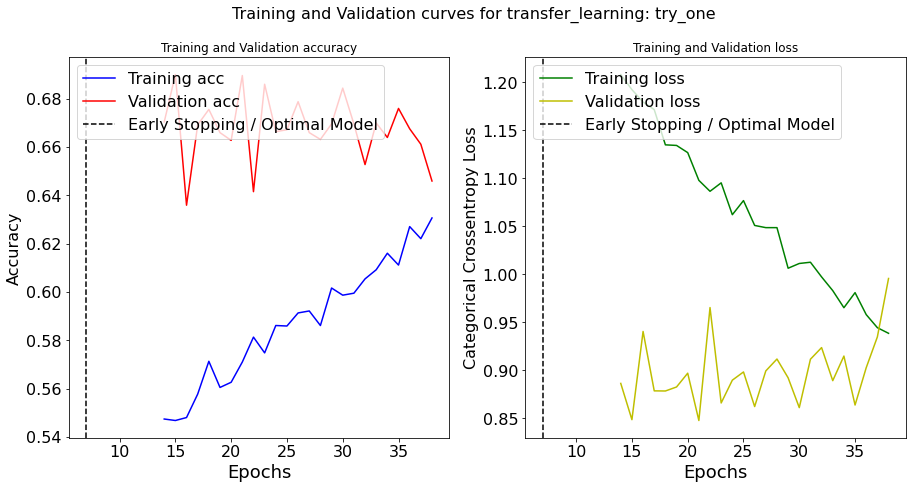

In [ ]:
model_training_report('/content/drive/MyDrive/FIB-2022-2023/aml/models/transfer_learning/try_one', plots=True)